In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motors-f/motors (4).csv


# Content of the Notebook:
* Duplicated Data
* Dealing with missing values
* data types
* out of range values
* unique inconsistency
* Dealing with Dates

In [117]:
df1=pd.read_csv("/kaggle/input/motors-f/motors (4).csv") #read data

In [118]:
df1.head() # see the first 5 rows of the data

,Unnamed: 0,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Gearbox_types
0,0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,6.0,13.5,Carburettor,NaN,Liquids,Chain,Manual
1,1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,NaN,Liquids,Chain,Manual
2,2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,6.0,13.5,Carburettor,NaN,Liquids,Chain,Manual
3,3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,6.0,13.5,Carburettor,NaN,Liquids,Chain,Manual
4,4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6.0,13.5,Turbo. KKK Acabion Extended,NaN,Liquids,Chain,Manual


In [119]:
df1.info() # used get a quick description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38504 entries, 0 to 38503
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38504 non-null  int64  
 1   Brand                38504 non-null  object 
 2   Model                38504 non-null  object 
 3   Year                 38504 non-null  object 
 4   Category             38504 non-null  object 
 5   Displacement (ccm)   37475 non-null  float64
 6   Power (hp)           38504 non-null  float64
 7   Engine cylinder      38499 non-null  object 
 8   Engine stroke        38504 non-null  object 
 9   Gearbox              38504 non-null  float64
 10  Fuel capacity (lts)  38504 non-null  float64
 11  Fuel system          38504 non-null  object 
 12  Fuel control         22032 non-null  object 
 13  Cooling system       38504 non-null  object 
 14  Transmission type    38504 non-null  object 
 15  Gearbox_types        38504 non-null 

What we noticed :
* there is unnamed : 0 column which means that occur when loading a CSV file after saving it it is like an index for each row
* Year column the data type of it need to be changed into int
* Displacement (ccm) , Engine cylinder  and Fuel control columns contain  null values

# Duplicated Data

In [120]:
df1.duplicated().sum()
# there is no duplicated data as there is column called unnamed 0 contains unique values it is better to drop it as it is not important
# but let us not drop it and know how to know the duplicated data using subset of features

0

In [121]:
df1.duplicated(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types']).sum()

# there is now 8 row the is duplicated so we will drop them

8

In [122]:
df1.drop_duplicates(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types'],inplace=True)


In [123]:
df1.duplicated(subset=['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel capacity (lts)', 'Fuel system', 'Cooling system', 'Transmission type', 'Gearbox_types']).sum()
# To check

0

# Dealing with missing values

### there are 3 techniques to deal with missing values :
1. if the missing values are too much  -> it is better to drop the column
2. if the missing values are too small -> it is good to drop the missing values 
3. if the missing values are greater than 5% -> we need to impute them with one of these (mean,median,mode) each has its case 

In [124]:
df1.isna().sum()/len(df1)*100 # this code returns percentage of missing values in each column

Unnamed: 0              0.000000
Brand                   0.000000
Model                   0.000000
Year                    0.000000
Category                0.000000
Displacement (ccm)      2.673005
Power (hp)              0.000000
Engine cylinder         0.012988
Engine stroke           0.000000
Gearbox                 0.000000
Fuel capacity (lts)     0.000000
Fuel system             0.000000
Fuel control           42.775873
Cooling system          0.000000
Transmission type       0.000000
Gearbox_types           0.000000
dtype: float64

What we noticed :
* Displacement (ccm) consists of 2.7% missing values which we impute it using mean or median
* Engine cylinder consists of 0.01% missing values which we can drop those null values it wont affect
* Fuel Control consists of 43% missing values which too big so it is better to drop the column than imputing the missing values


## Case 3

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

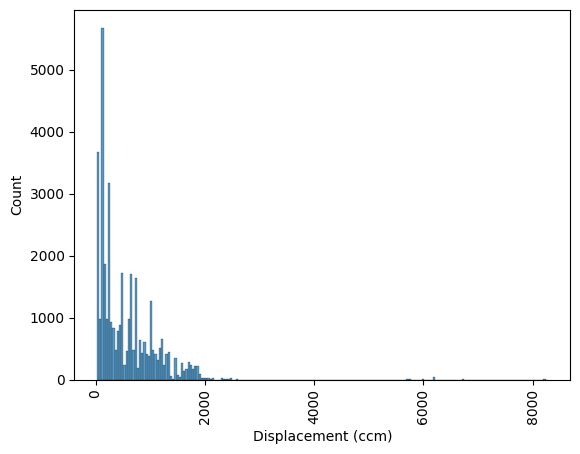

In [125]:
sns.histplot(data=df1,x='Displacement (ccm)')
plt.xticks(rotation=90)
# there is skewness in the data so it is better to impute the null values with median rather than mean

In [126]:
df1['Displacement (ccm)'].fillna(df1['Displacement (ccm)'].median(),inplace=True) # impute the null values with median

## Case 2

In [127]:
df1['Engine cylinder'].isna().sum() # we can drop the null values it wont affect

5

In [128]:
df1.dropna(subset=['Engine cylinder'], inplace=True)

## Case 1

In [129]:
df1['Fuel control'].isna().sum()/len(df1) # it is about 43 it is better to drop the column

0.427814294250604

In [130]:
df1.drop(['Fuel control'],axis=1,inplace=True)

In [131]:
df1.isna().sum()/len(df1)*100
#lets check 
# now all is well :)

Unnamed: 0             0.0
Brand                  0.0
Model                  0.0
Year                   0.0
Category               0.0
Displacement (ccm)     0.0
Power (hp)             0.0
Engine cylinder        0.0
Engine stroke          0.0
Gearbox                0.0
Fuel capacity (lts)    0.0
Fuel system            0.0
Cooling system         0.0
Transmission type      0.0
Gearbox_types          0.0
dtype: float64

# Data Types

In [132]:
df1['Year'].unique()
# i notice that there is future year 2040 which is unlogical
# the unique values are mixed with strings and integers
# there are some rows that contain chars not only integers
# the data type need to change to int also removing CE that is next to year

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2040', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
     

In [133]:
df1['Year'] = df1['Year'].astype(str)

# Step 2: Remove 'CE' suffix and strip whitespace
df1['Year'] = df1['Year'].str.replace(' CE', '').str.strip()

# Step 3: Convert to integer
df1['Year']=df1['Year'].astype(int)

In [134]:
df1['Year'].unique()

array([2011, 2007, 2021, 2016, 2018, 2020, 2022, 1923, 1924, 1925, 1926,
       1927, 2009, 2010, 2014, 2008, 2019, 2012, 2013, 2040, 1957, 1958,
       1955, 1956, 1952, 1953, 1954, 1959, 1960, 2077, 2003, 3019, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1970,
       1974, 2005, 2015, 2006, 1922, 1928, 1949, 1950, 1951, 2001, 2017,
       1986, 1999, 1985, 1987, 1996, 1991, 1988, 1989, 1990, 1992, 2004,
       2002, 1997, 1998, 2000, 1993, 1984, 1995, 1948, 1937, 1938, 1931,
       1901, 1902, 1903, 1913, 1914, 1915, 1916, 1918, 1932, 1933, 1934,
       1935, 1936, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1898, 1910, 1929, 1975, 1976, 1973, 1977, 1978, 1979, 1980, 1982,
       1983, 1981, 1917, 1919, 1994, 1930, 1897, 1920, 1921, 1899, 1900,
       1904, 1896, 1911, 1912, 1909, 1905, 1906, 1907, 1908, 1894, 1895])

# Out of range values

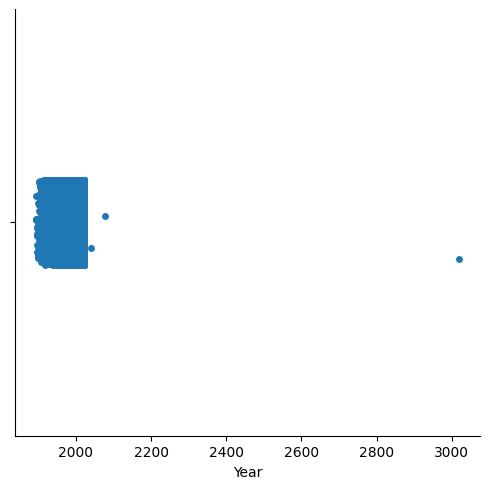

In [135]:
 sns.catplot(data=df1,x='Year')
 # there is an outlier so we need to deal with it

In [136]:
df1['Year'][df1['Year']>2024]
# as we can see there is out of range data so we will replace it with 2024

58     2040
133    2077
170    3019
Name: Year, dtype: int64

In [137]:
df1['Year'][df1['Year']>2024]=2024
# this is a hard coded we can do the same thing using dynamic code :
# df1['Year'][df1['Year']>2024]= dt.now().year

# Unique Inconsistency

In [138]:
df1['Cooling system'].unique()
# there are words that have the same meaning so we need to clean that ( Ex : Air - air)

array(['Liquids', 'Air', 'air', 'Oil and air'], dtype=object)

In [140]:
df1['Cooling system'].replace('air','Air',inplace=True)

<Axes: xlabel='Cooling system', ylabel='count'>

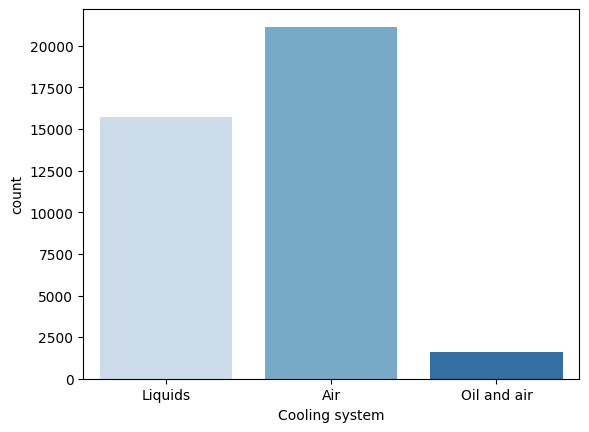

In [142]:
sns.countplot(data=df1,x='Cooling system',palette='Blues')

# Dealing with Dates

##  since there is no dates in this data so we have to upload another one that have date
### we need to check the data type , how to extract month , day , year from it 

In [143]:
df2=pd.read_csv("/kaggle/input/coffee-sales/index.csv")

In [144]:
df2.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1208 non-null   object 
 1   datetime     1208 non-null   object 
 2   cash_type    1208 non-null   object 
 3   card         1119 non-null   object 
 4   money        1208 non-null   float64
 5   coffee_name  1208 non-null   object 
dtypes: float64(1), object(5)
memory usage: 56.8+ KB


what i noticed:
* there are two values of dates that need to convert their type to date
* card column has also a missing values that need to be dealt with

### pandas.Timestamp VS datetime.date
* if you convert the date column to a datetime.date object (which only includes the date without time), you won't be able to directly extract the month, year, and day using the dt accessor anymore.

* you can still extract the month, year, and day using standard Python attributes

* If you'd prefer to use the .dt accessor, keep the date column as a pandas.Timestamp

In [147]:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce').dt.date
df2['datetime'] = pd.to_datetime(df2['datetime'], errors='coerce')
# errors = coerce will make it return nan values for values that can't be converted
df2.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [158]:
df2.info() # notice the data type of date and datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1208 non-null   object        
 1   datetime     1208 non-null   datetime64[ns]
 2   cash_type    1208 non-null   object        
 3   card         1119 non-null   object        
 4   money        1208 non-null   float64       
 5   coffee_name  1208 non-null   object        
 6   month        1208 non-null   int32         
 7   day          1208 non-null   int32         
 8   hour         1208 non-null   int32         
 9   year         1208 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 75.6+ KB


In [156]:
# extract month,day and Year from date column using python code without using `.dt` accessor

# df2['year'] = df2['date'].apply(lambda x: x.year )
# df2['month'] = df2['date'].apply(lambda x: x.month )
# df2['day'] = df2['date'].apply(lambda x: x.day )


In [157]:
df2['year'] = df2['datetime'].dt.year   # this will extract the year from the date
df2['month'] = df2['datetime'].dt.month   # this will extract the month from the date
df2['day'] = df2['datetime'].dt.day       # this will extract the day from the date
df2['hour'] = df2['datetime'].dt.hour # this will extract the hour from the date
df2.head()
# now we can drop the two columns date and date time as we no longer need it , but i'll keep them

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,10,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,13,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,13,2024


### there are null values in card column lets clean it

In [159]:
df2.fillna(df2['card'].mode()[0],inplace=True)
# as the column is object we can impute it with mode

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1208 non-null   object        
 1   datetime     1208 non-null   datetime64[ns]
 2   cash_type    1208 non-null   object        
 3   card         1208 non-null   object        
 4   money        1208 non-null   float64       
 5   coffee_name  1208 non-null   object        
 6   month        1208 non-null   int32         
 7   day          1208 non-null   int32         
 8   hour         1208 non-null   int32         
 9   year         1208 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 75.6+ KB


# This is the END of Cleaning Notebook , Thanks